<a href="https://colab.research.google.com/github/sbadrunin/sbadrunin/blob/main/Mushroom_Dataset_%F0%9F%8D%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🍄**Mushroom dataset classification**🍄


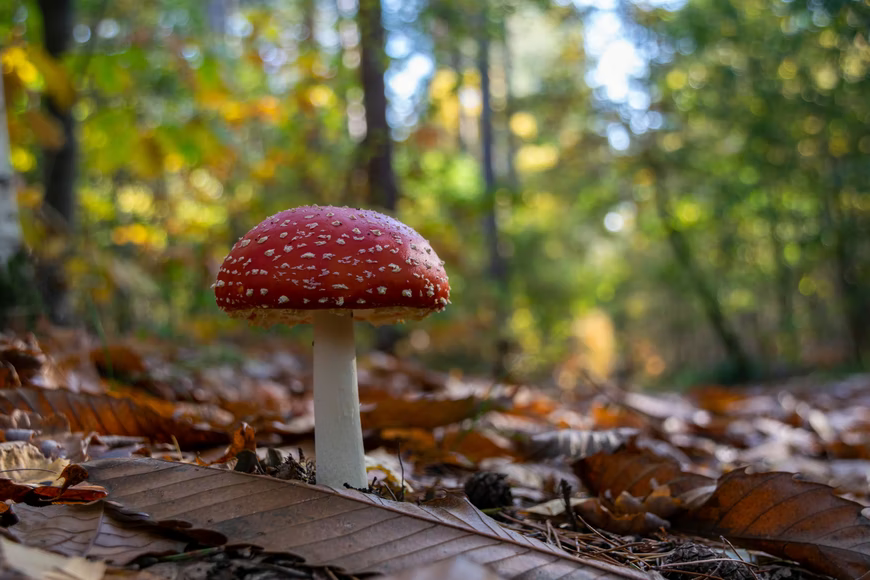



# **Overview**


*Have you ever picked up a wild mushroom and wondered whether it was edible or not? Me neither, but for those of you who are curious, keep reading to learn which mushrooms are safe and which ones will send you down the rabbit hole.* 🍄

The mushroom classification analysis is a beginner machine learning problem that everyone does. This mushroom dataset purely contains of categorical features and the aim of this project is find out whether we can determine which mushrooms we should avoid based on their characteristics. This  will be  done by creating models to classify whether a mushroom with specific traits is edible or poisonous. The data guide states that there is no simple rule to determine whether a mushroom is poisonous or not. This is why a machine learning classification models would be useful. 

In this project the following classifiers were used to make predictions:

*   Decision Tree
*   Random Forest 







# **Exploratory Data Analysis (EDA)** **&** **Visualisations**



**Importing all the modules/libraries**

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 


from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

from time import time

# Decision tree & Random Forest

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Ignore all warnings:
import warnings
warnings.filterwarnings("ignore")


**Loading the file** 

In [ ]:
# Import the dataset into a pandas dataframe
df = pd.read_csv('mushrooms.csv')

In [ ]:
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


Data imported! :) 

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


We can use '.info()' to get the column names, number of values, data types and count of nulls

In [ ]:
# Checking for any null values as welll as the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Checking to make sure there are no null values

In [ ]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
df.shape

(8124, 23)

So, overall there are 8124 entries and 23 columns. There are no null values as well. Amazing!! Not much to clean.

In [ ]:
# Checking all the unique variable within each columns
for item in df.columns:
    print(item)
    print (df[item].unique())

class
['p' 'e']
cap-shape
['x' 'b' 's' 'f' 'k' 'c']
cap-surface
['s' 'y' 'f' 'g']
cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises
['t' 'f']
odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment
['f' 'a']
gill-spacing
['c' 'w']
gill-size
['n' 'b']
gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape
['e' 't']
stalk-root
['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring
['s' 'f' 'k' 'y']
stalk-surface-below-ring
['s' 'f' 'y' 'k']
stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type
['p']
veil-color
['w' 'n' 'o' 'y']
ring-number
['o' 't' 'n']
ring-type
['p' 'e' 'l' 'f' 'n']
spore-print-color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population
['s' 'n' 'a' 'v' 'y' 'c']
habitat
['u' 'g' 'm' 'd' 'p' 'w' 'l']


As you can see the unique variables within each column are represented by a letter which reflect back to the attribute information below. 

**Attribute Information:**

**classes**: *edible = e, poisonous = p*

**cap-shape**: *bell = b, conical = c, convex = x, flat = f, knobbed = k, sunken = s*

**cap-surface**: *fibrous = f, grooves = g, scaly = y, smooth = s*

**cap-color**: *brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple = u, red = e, white = w, yellow = y*

**bruises**: *yes = t, no = f*

**odor**: *almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s*

**gill-attachment**: *attached = a, free = f*

**gill-spacing**: *close = c, crowded = w*

**gill-size**: *broad = b, narrow = n*

**gill-colo**r: *black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w ,yellow = y*

**stalk-shape**: *enlarging = e, tapering = t*

**stalk-root**: *bulbous = b, club = c, equal = e, rooted = r, missing = ?*

**stalk-surface-above-ring**: *fibrous = f, scaly = y, silky = k, smooth = s*

**stalk-surface-below-ring**: *fibrous = f, scaly = y, silky = k, smooth = s*

**stalk-color-above-ring**: *brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y*

**stalk-color-below-ring**: *brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y*

**veil-type**: *partial = p*

**veil-color**: *brown = n, orange = o, white = w, yellow = y*

**ring-number**: none = n, one = o, two = t

**ring-type**: *evanescent = e, flaring = f, large = l, none = n, pendant = p*

**spore-print-color**: *black = k, brown = n, buff = b, chocolate = h, green = r, orange = o,purple = u, white = w, yellow = y*

**population**: *abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y*

**habitat**: *grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d*

As dashes(-) can be annoying, the code below will replace all the dashes in the column names with an underscore(_), for convenience.

In [ ]:
# Changing the column names by adding a " _ " in place of a "-" 
for col in df.columns:
    if '-' in col:
        df = df.rename(columns={col:col.replace('-','_')})


Here, I'm just checking to see if the code worked, which it did (Yay ya!).

In [ ]:
df.columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

Going back to the attributed information, I found that having to always reflect back to the list of attributed information to find out what a letter meant was quite long and inefficient, so I used it to create a data dictionary which replaces the letters to their meanings.


In [ ]:
# dicitionary for better understanding the labels when it comes to visualising the data 

capshape={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
df["cap_shape"]=df["cap_shape"].replace(capshape)

capsurface={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
df["cap_surface"]=df["cap_surface"].replace(capsurface)

capcolor={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["cap_color"]=df["cap_color"].replace(capcolor)

odor={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
df["odor"]=df["odor"].replace(odor)

gillattachment={"a":"attached","f":"free"}
df["gill_attachment"]=df["gill_attachment"].replace(gillattachment)

gillspacing={"c":"close","w":"crowded"}
df["gill_spacing"]=df["gill_spacing"].replace(gillspacing)

gillsize={"b":"broad","n":"narrow"}
df["gill_size"]=df["gill_size"].replace(gillsize)

gillcolor={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["gill_color"]=df["gill_color"].replace(gillcolor)

stalkshape={"t":"tapering","e":"enlarging"}
df["stalk_shape"]=df["stalk_shape"].replace(stalkshape)

stalkroot={"b":"bulbous","c":"club","e":"equal","r":"rooted","?":"missing"}
df["stalk_root"]=df["stalk_root"].replace(stalkroot)

stalksurface={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
df["stalk_surface_above_ring"]=df["stalk_surface_above_ring"].replace(stalksurface)
df["stalk_surface_below_ring"]=df["stalk_surface_below_ring"].replace(stalksurface)

stalkcolor ={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
df["stalk_color_above_ring"]=df["stalk_color_above_ring"].replace(stalkcolor)
df["stalk_color_below_ring"]=df["stalk_color_below_ring"].replace(stalkcolor)

veiltype={"p":"partial"} 
df["veil_type"]=df["veil_type"].replace(veiltype)

veilcolor={"n":"brown","o":"orange","w":"white","y":"yellow"} 
df["veil_color"]=df["veil_color"].replace(veilcolor)

ringnumber= {"n":"none","o":"one","t":"two"}
df["ring_number"]=df["ring_number"].replace(ringnumber)

ringtype={"e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant"}
df["ring_type"]=df["ring_type"].replace(ringtype)

sporeprintcolor= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
df["spore_print_color"]=df["spore_print_color"].replace(sporeprintcolor)

population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
df["population"]=df["population"].replace(population)

habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
df["habitat"]=df["habitat"].replace(habitat)

bruises={"t":"bruises","f":"no"}
df["bruises"]=df["bruises"].replace(bruises)

Again, I'm checking to see if the code worked, which it did! It looks so much better and a lot easier to understand.

In [ ]:
# Checking to see if it worked
df.head(3)

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,e,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows


Upon doing a value count on the column "stalk_root", the data indicated around 30% missing (?), this will be taken as None, meaning the the mushrooms had no stalk-root. 

In [ ]:
df['stalk_root'].value_counts() 
# 30% missing values = ?

bulbous    3776
missing    2480
equal      1120
club        556
rooted      192
Name: stalk_root, dtype: int64

The veil_type variable has only one value, 'p', meaning, every mushroom has the same veil_type. Therefore, that column doesn't tell us anything useful - so we can drop the column.


In [ ]:
# dropping column 
df = df.drop(columns="veil_type")
df.head(2)

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,e,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses


## 📊 **Visualising the distributions**

In this step, I will visualise each feature by its class distribution. The "class" refers to whether the mushroom is edible or poisonous.

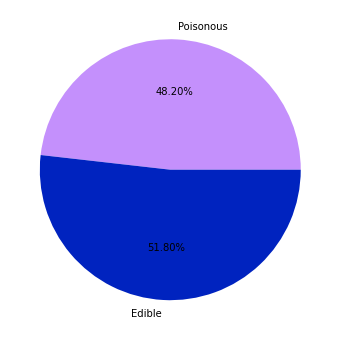

In [ ]:
plt.figure(figsize=(6, 6))
mushrooms = ['Poisonous','Edible']
count = [len(df[df['class'] == 'p']),len(df[df['class'] == 'e'])]
colors = ['#c490fc','#0023bf']
plt.pie(count, labels = mushrooms,colors=colors,autopct='%1.2f%%')
plt.show()

In [ ]:
def with_hue(feature, col, Number_of_categories, hue_categories):

    # This part plot the graph
    # feature is the columns 
    plt.figure(figsize=(8, 8))
    ax = sns.countplot(feature, hue = df['class'], order = 
    feature.value_counts().index, palette = ['#c490fc','#0023bf'])

    # This part of the code gives us the count of mushrooms on top of the graph  
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
        
    # The rest is the title and labels 
                   
    plt.legend(['Poisonous', 'Edible'], loc='upper right')
    plt.ylabel('Number of the Mushrooms', fontsize=14)
    plt.xlabel(col , fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f'Distribution of the Mushrooms by their Classes and {col}')
    plt.show()

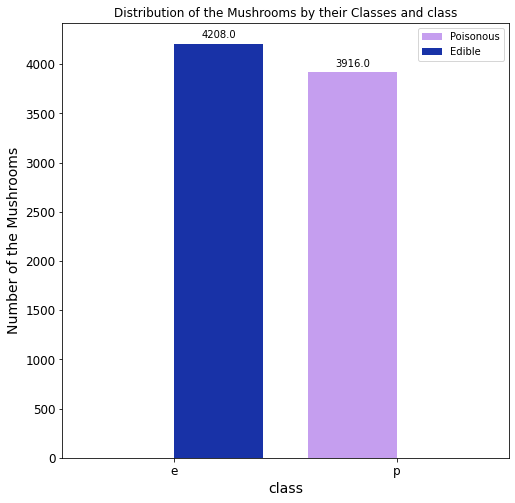

In [ ]:
with_hue(df['class'], 'class', 2, 2 )

**Observations**:
48% of the mushrooms within the dataset are poisonous and 52% are edible mushrooms.There is no imbalance in class features.



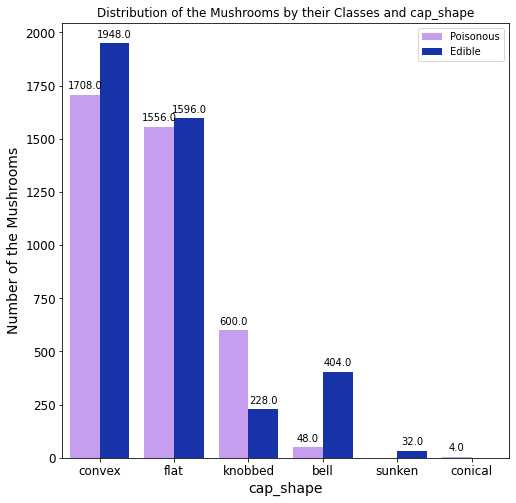

In [ ]:
with_hue(df.cap_shape, 'cap_shape', 6,2 )

**Observations**:


* There are more convex and flat shaped mushrooms in the 
dataset. 
* Bell cap shape mushrooms are more edible, whereas, knobbed cap shape mushrooms are more poisonous.
* Sunken cap shape has only edible mushroom whereas conical cap shape has only poisonous mushrooms.

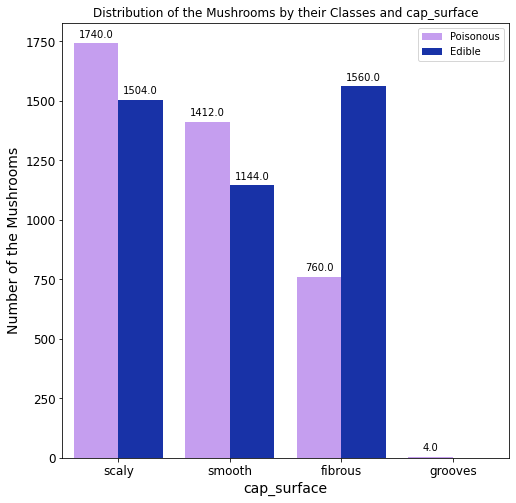

In [ ]:
with_hue(df.cap_surface, 'cap_surface', 4, 2 )


**Observations**:

This graph shows that scaly and smooth cap surfaces have more poisonous mushrooms whereas fibrous cap surface mushroom has more edible mushrooms. 
Also, grooves cap surface mushrooms has only poisonous mushrooms and are very low in numbers.


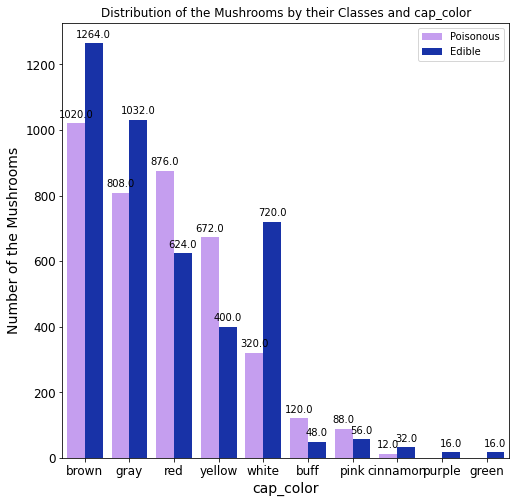

In [ ]:
with_hue(df.cap_color, 'cap_color', 10, 2 )

**Observations**: 

* There are more brown colored mushrooms followed by gray and red. The majority of brown, white and gray mushrooms are edible whereas, the majority of red and yellow are poisonous. 

* Purple and green colored mushrooms are all edible however they are low in numbers.


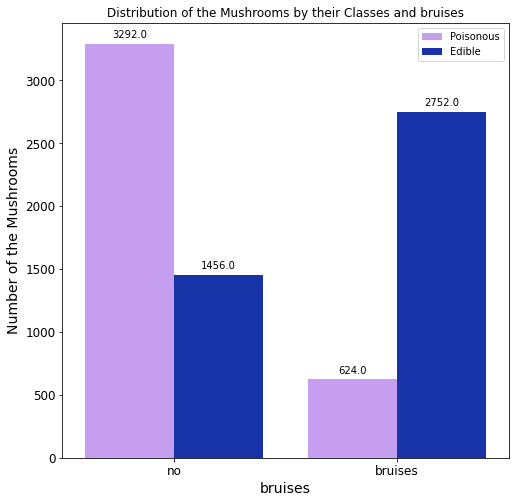

In [ ]:
with_hue(df['bruises'], 'bruises', 2, 2 )

**Observations**:

There are more number of mushrooms that do not have bruises at all.

The graphs here indicates that mushrooms that are bruised are likely to be more edible than those that do not have any bruises in which most of them are poisonous. 

*Also, note that, not all bruised mushrooms are edible and vice versa. There are other factors involved in it. But we can say what bruise can be one of the important feature while predicting class.*


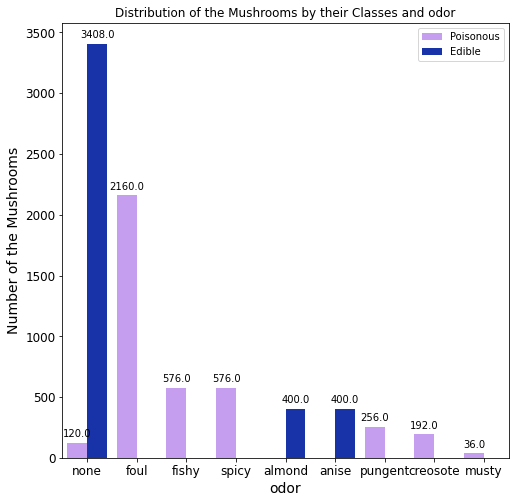

In [ ]:
with_hue(df['odor'], 'odor', 9, 2 )


**Observations**:

* There are more mushrooms with no odor and foul smelling in this dataset. 

* All foul, fishy, spicy, pungent, creosote and musty odor mushrooms are poisonous. Whereas, all almond and anise odor mushrooms are edible. 

* Mushroom without any odor are more likely to be edible, however, they can also be poisonous. Therefore, Odor can be one of the most important feature while predicting the class of mushrooms.

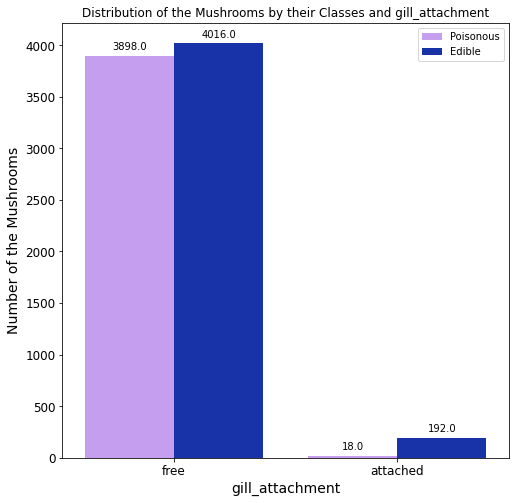

In [ ]:
with_hue(df.gill_attachment, 'gill_attachment', 2,2 )


**Observations**:

* The majority of mushrooms have a free gill attachment. Therefore it is not really an important feature when classifying whether a mushroom is edible or poisonous. Essentially we can drop this column when modelling later on. 
* Also mushrooms with gill attachment type as attached are mostly edible.


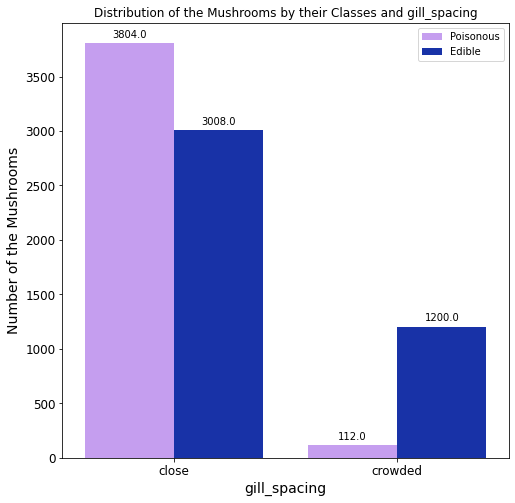

In [ ]:
with_hue(df.gill_spacing, 'gill_spacing', 2,2 )

**Observations**:

This graph shows that there are more closed gill spacing mushrooms. Also most of the crowded spacing mushrooms are edible.

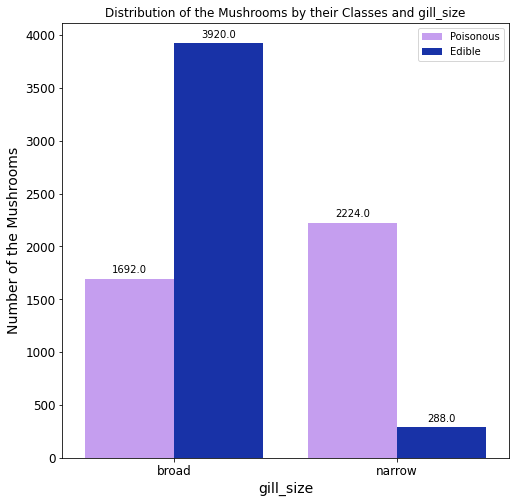

In [ ]:
with_hue(df.gill_size, 'gill_size', 2, 2 )


**Observations**:

* Broad gill size mushrooms are the majority in this dataset.

* Most of the broad gill size mushrooms are edible whereas, most of the narrow gill size mushrooms are poisonous. 

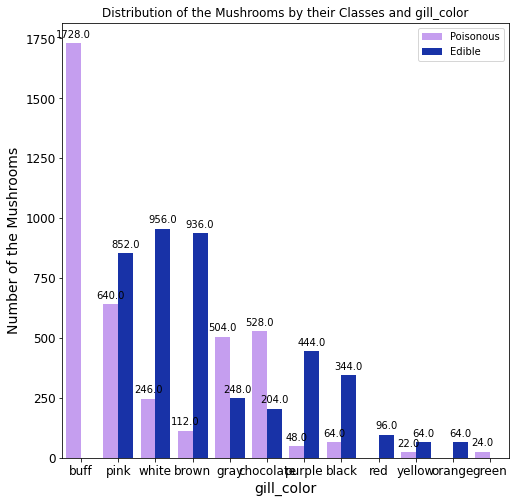

In [ ]:
with_hue(df.gill_color, 'gill_color', 12,2 )


**Observations**:

* There are high numbers of buff gill color mushrooms followed by pink, white and brown. 

* All buff and green gill colored mushrooms are poisonous. 

* All red and orange gill color mushrooms are edible. 

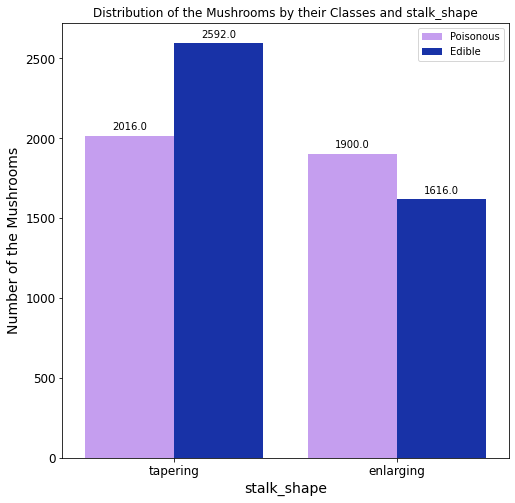

In [ ]:
with_hue(df.stalk_shape, 'stalk_shape', 2, 2 )


Observations:

It doesn’t appear to be a significant difference while classifying whether mushroom are stalk shaped tapering or enlarging. Therefore we can drop this column when feature engineering. Although it does look like enlarging stalk shape are more poisonous whereas tapering are more edible. 

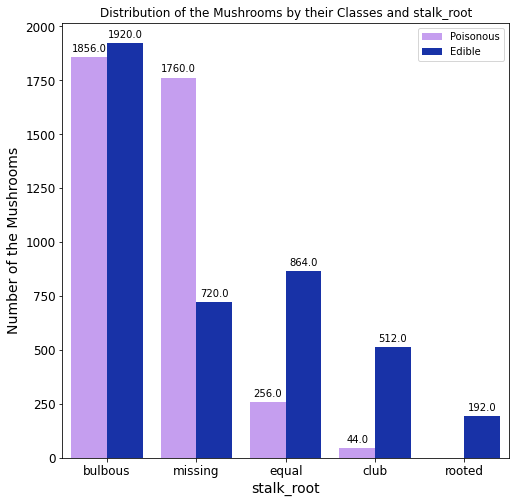

In [ ]:
with_hue(df.stalk_root, 'stalk_root', 5,2 )

There are more bulbous type stalk root within the data set. The majority of equal and club stalk root are edible. All rooted stalk root mushrooms are edible. 
The missing stalk root here is an assumption that the mushroom doesn’t have a stalk root.


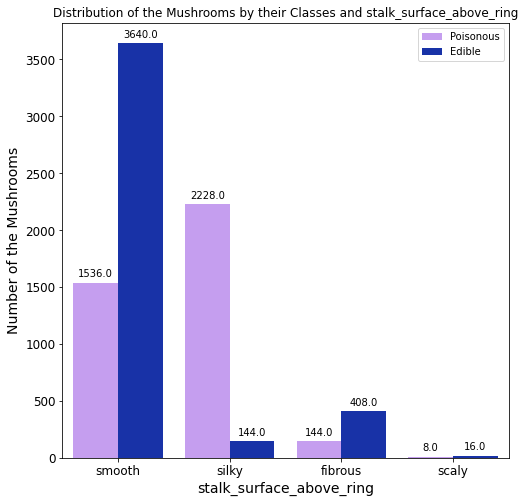

In [ ]:
with_hue(df.stalk_surface_above_ring, 'stalk_surface_above_ring', 4, 2 )

**Observations**:

The majority of stalk surface above ring mushrooms are smooth followed by silky. The smooth surface mushrooms are more edible whereas most of the silky ones are poisonous

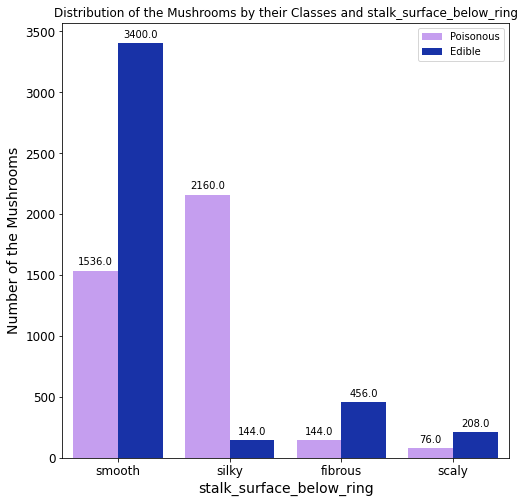

In [ ]:
with_hue(df.stalk_surface_below_ring, 'stalk_surface_below_ring', 4, 2 )

**Observations**:

Same observations as stalk surface above ring mushrooms.

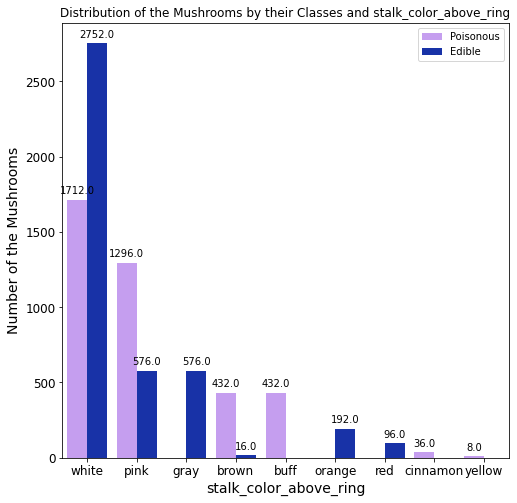

In [ ]:
with_hue(df.stalk_color_above_ring, 'stalk_color_above_ring', 9, 2 )


**Observations**:
* There are more white stalk color above ring mushrooms.
* The majority of white stalk color mushroom are edible. All gray, orange and red are edible. 
* Most pink and brown are poisonous, and all buff, cinnamon and yellow mushrooms are poisonous. 


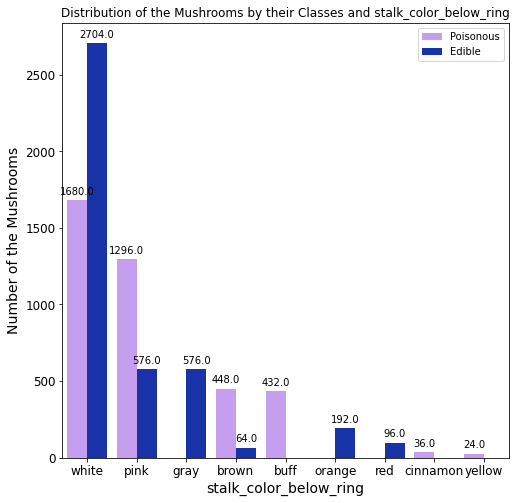

In [ ]:
with_hue(df.stalk_color_below_ring, 'stalk_color_below_ring', 9,2 )



**Observations:**

Same observations as stalk colour above ring mushrooms

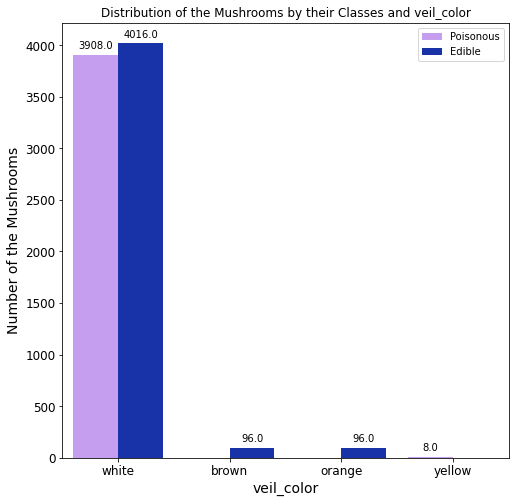

In [ ]:
with_hue(df.veil_color, 'veil_color', 4, 2 )

Observations:

* The majority of veil coloured mushrooms within the dataset are white. There is no significant difference when classifying white veil color mushrooms. 	
* All brown and orange veil color mushroom are edible whereas all yellow are poisonous. 


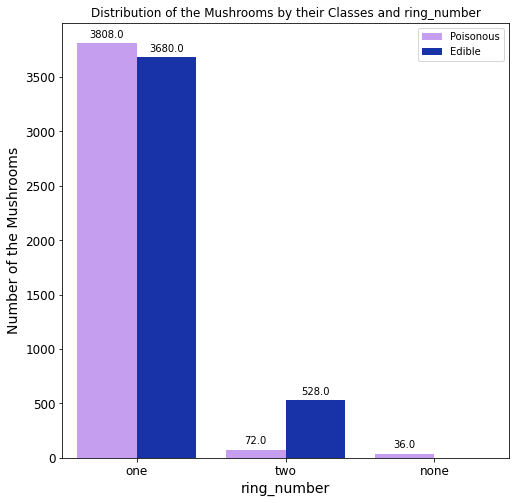

In [ ]:
with_hue(df.ring_number, 'ring_number', 3, 2 )

**Observations:**

* Ring number one mushrooms are more present in the dataset. There is also no significant difference when classifying ring number one mushrooms. 
* None ring number mushrooms are less present and all poisonous.
* Mushrooms with to ring number are more edible.


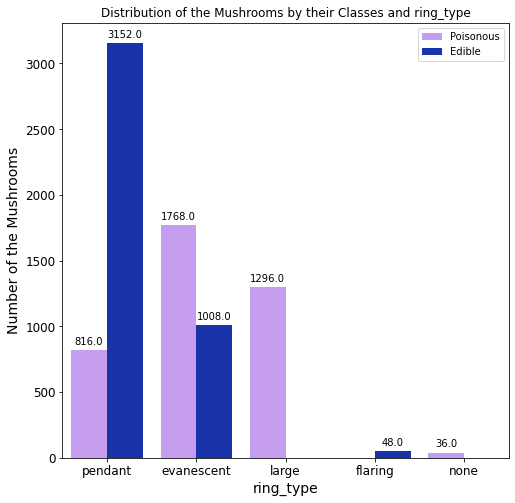

In [ ]:
with_hue(df.ring_type, 'ring_type', 5,2 )

**Observations**:

* Pendant ring type mushrooms are more present in the dataset and most of them are edible. 
* All large and none ring type mushrooms are poisonous.
* All flaring are edible. 


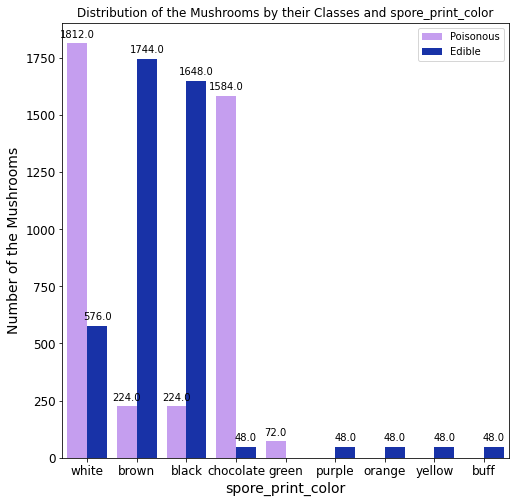

In [ ]:
with_hue(df.spore_print_color, 'spore_print_color', 9, 2 )

**Observations**:

* White spore print color mushrooms are more present followed by brown, black & chocolate
* The majority of white and chocolate spore print color mushrooms are poisonous.
* The majority of black and brown spore print color mushrooms are edible.
* All green spore print are poisonous
* All purple, orange, yellow, buff spore print are edible. 


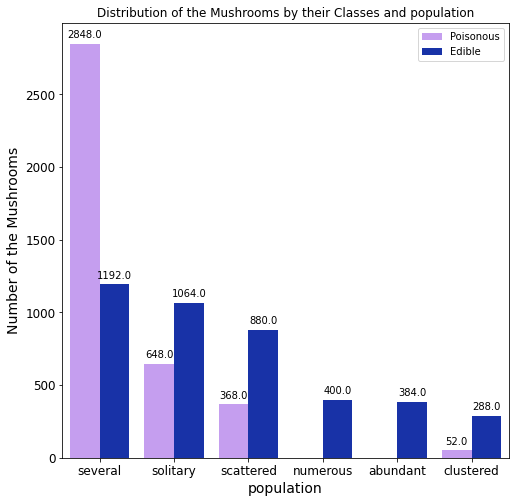

In [ ]:
with_hue(df.population, 'population', 6,2 )

**Observations**:

* Population type several mushrooms are more present and the majority of them are poisonous.
* All numerous and abundant population type mushrooms are edible.
* Most of the scattered & solitary mushrooms are also edible.


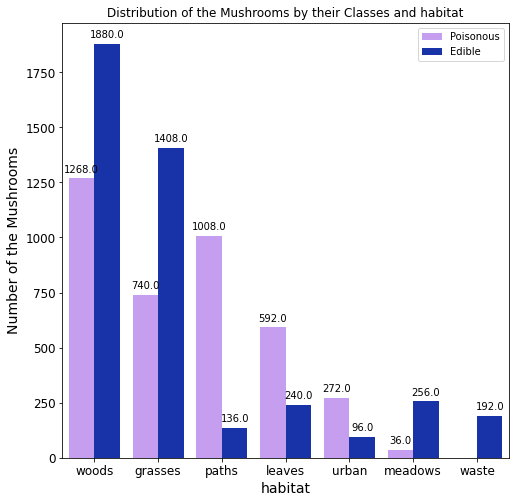

In [ ]:
with_hue(df.habitat, 'habitat', 7,2 )

**Observations**:

* Mushrooms found in woods are more present in the dataset and the majority of them are edible.
* Most mushrooms found in the grass and meadows are most likely to be edible
*	All the mushrooms found on the waste are edible.
* The majority of mushrooms found around paths, leaves, and urban habitat are likely to be edible. 


In [ ]:
df.groupby(['cap_shape'])['class'].value_counts().to_frame()

class
cap_shape class       
bell      e        404
          p         48
conical   p          4
convex    e       1948
          p       1708
flat      e       1596
          p       1556
knobbed   p        600
          e        228
sunken    e         32

##0️⃣1️⃣ **Changing the data types to numeric!**

I used a simple binary label encoder for variables that hold only 2 values, and one-hot-encoded for variables that hold 3 or more values. 

This is done mainly because label encoding can be misinterpreted by algorithms as having an order/hierarchy. In order to avoid this, this is where one hot encoding comes in. 



In [ ]:
#For columns with only two values
for col in df.columns:
    if len(df[col].value_counts()) == 2:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])


You know the drill, we're checking to see if it worked 

In [ ]:
df.head(2)

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,convex,smooth,brown,0,pungent,1,0,1,black,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,0,convex,smooth,yellow,0,almond,1,0,0,black,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses


In [ ]:
df['class'].value_counts()
# 0 = edible
# 1 = poisonus

0    4208
1    3916
Name: class, dtype: int64

Here we are one hot encoding the rest of the variables

In [ ]:
one_hot = ['cap_shape','cap_surface','cap_color', 'odor', 'gill_color', 'stalk_root',
          'stalk_surface_above_ring', 'stalk_surface_below_ring','stalk_color_above_ring',
           'stalk_color_below_ring', 'veil_color', 'ring_type', 'spore_print_color',
          'population', 'habitat', 'ring_number']
df = pd.get_dummies(df, columns= one_hot, prefix= one_hot)
df

,class,bruises,gill_attachment,gill_spacing,gill_size,stalk_shape,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,...,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,ring_number_none,ring_number_one,ring_number_two
0,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,1,1,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
8120,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
8121,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
8122,1,1,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


Checking the data types 

In [ ]:
df.dtypes

class               int64
bruises             int64
gill_attachment     int64
gill_spacing        int64
gill_size           int64
                    ...  
habitat_waste       uint8
habitat_woods       uint8
ring_number_none    uint8
ring_number_one     uint8
ring_number_two     uint8
Length: 112, dtype: object

Checking to see the new columns

In [ ]:
list(df.columns)

['class',
 'bruises',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'stalk_shape',
 'cap_shape_bell',
 'cap_shape_conical',
 'cap_shape_convex',
 'cap_shape_flat',
 'cap_shape_knobbed',
 'cap_shape_sunken',
 'cap_surface_fibrous',
 'cap_surface_grooves',
 'cap_surface_scaly',
 'cap_surface_smooth',
 'cap_color_brown',
 'cap_color_buff',
 'cap_color_cinnamon',
 'cap_color_gray',
 'cap_color_green',
 'cap_color_pink',
 'cap_color_purple',
 'cap_color_red',
 'cap_color_white',
 'cap_color_yellow',
 'odor_almond',
 'odor_anise',
 'odor_creosote',
 'odor_fishy',
 'odor_foul',
 'odor_musty',
 'odor_none',
 'odor_pungent',
 'odor_spicy',
 'gill_color_black',
 'gill_color_brown',
 'gill_color_buff',
 'gill_color_chocolate',
 'gill_color_gray',
 'gill_color_green',
 'gill_color_orange',
 'gill_color_pink',
 'gill_color_purple',
 'gill_color_red',
 'gill_color_white',
 'gill_color_yellow',
 'stalk_root_bulbous',
 'stalk_root_club',
 'stalk_root_equal',
 'stalk_root_missing',
 'stalk_root_r

#🖇 **Feature Engineering**

In [ ]:
# Experiment with changing the useful columns

feature_cols = list(df.columns)

cols_to_remove = ['class', 'bruises', 'gill_attachment', 'gill_spacing', 
 'cap_shape_bell','cap_shape_conical','cap_shape_convex',
 'cap_shape_flat', 'cap_shape_knobbed','cap_shape_sunken','cap_surface_fibrous',
 'cap_surface_scaly','cap_surface_smooth','cap_color_brown',
 'cap_color_buff', 'cap_color_cinnamon', 'cap_color_gray','cap_color_green',
 'cap_color_pink','cap_color_purple','cap_color_red','cap_color_white',
 'cap_color_yellow', 'stalk_shape','odor_creosote','odor_fishy','odor_foul',
 'odor_musty','odor_pungent','odor_spicy','gill_color_black','gill_color_brown',
 'gill_color_buff', 'gill_color_chocolate','gill_color_gray','gill_color_green',
 'gill_color_orange','gill_color_pink','gill_color_purple','gill_color_red',
 'gill_color_white','gill_color_yellow','stalk_root_bulbous',
 'stalk_root_equal','stalk_root_missing','stalk_surface_above_ring_fibrous',
 'stalk_surface_above_ring_scaly','stalk_surface_above_ring_silky',
 'stalk_surface_above_ring_smooth','stalk_surface_below_ring_fibrous',
 'stalk_surface_below_ring_silky','stalk_surface_below_ring_smooth','stalk_color_above_ring_brown',
 'stalk_color_above_ring_buff','stalk_color_above_ring_cinnamon',
 'stalk_color_above_ring_gray','stalk_color_above_ring_orange',
 'stalk_color_above_ring_pink', 'stalk_color_above_ring_red',
 'stalk_color_above_ring_white','stalk_color_above_ring_yellow',
 'stalk_color_below_ring_brown', 'stalk_color_below_ring_buff',
 'stalk_color_below_ring_gray', 'stalk_color_below_ring_orange','stalk_color_below_ring_pink',
 'stalk_color_below_ring_red','stalk_color_below_ring_white',
 'stalk_color_below_ring_yellow','veil_color_brown','veil_color_orange',
 'veil_color_white','veil_color_yellow','ring_type_evanescent','ring_type_flaring',
 'ring_type_large','ring_type_none','ring_type_pendant','spore_print_color_black',
 'spore_print_color_brown','spore_print_color_buff','spore_print_color_chocolate',
 'spore_print_color_orange','spore_print_color_purple',
 'spore_print_color_white', 'spore_print_color_yellow','population_abundant',
 'population_numerous','population_scattered','population_several',
 'population_solitary','habitat_grasses','habitat_leaves','habitat_meadows',
 'habitat_paths', 'habitat_urban','habitat_waste','habitat_woods','ring_number_none',
 'ring_number_one']

for col in cols_to_remove:
    feature_cols.remove(col)

Time to split the data into training and testing sets.

In [ ]:
## Test Train Split (Random state = 124)

X = df.drop(columns=['class', 'bruises', 'gill_attachment', 'gill_spacing', 
 'cap_shape_bell','cap_shape_conical','cap_shape_convex',
 'cap_shape_flat', 'cap_shape_knobbed','cap_shape_sunken','cap_surface_fibrous',
 'cap_surface_scaly','cap_surface_smooth','cap_color_brown',
 'cap_color_buff', 'cap_color_cinnamon', 'cap_color_gray','cap_color_green',
 'cap_color_pink','cap_color_purple','cap_color_red','cap_color_white',
 'cap_color_yellow', 'stalk_shape','odor_creosote','odor_fishy','odor_foul',
 'odor_musty','odor_pungent','odor_spicy','gill_color_black','gill_color_brown',
 'gill_color_buff', 'gill_color_chocolate','gill_color_gray','gill_color_green',
 'gill_color_orange','gill_color_pink','gill_color_purple','gill_color_red',
 'gill_color_white','gill_color_yellow','stalk_root_bulbous',
 'stalk_root_equal','stalk_root_missing','stalk_surface_above_ring_fibrous',
 'stalk_surface_above_ring_scaly','stalk_surface_above_ring_silky',
 'stalk_surface_above_ring_smooth','stalk_surface_below_ring_fibrous',
 'stalk_surface_below_ring_silky','stalk_surface_below_ring_smooth','stalk_color_above_ring_brown',
 'stalk_color_above_ring_buff','stalk_color_above_ring_cinnamon',
 'stalk_color_above_ring_gray','stalk_color_above_ring_orange',
 'stalk_color_above_ring_pink', 'stalk_color_above_ring_red',
 'stalk_color_above_ring_white','stalk_color_above_ring_yellow',
 'stalk_color_below_ring_brown', 'stalk_color_below_ring_buff',
 'stalk_color_below_ring_gray', 'stalk_color_below_ring_orange','stalk_color_below_ring_pink',
 'stalk_color_below_ring_red','stalk_color_below_ring_white',
 'stalk_color_below_ring_yellow','veil_color_brown','veil_color_orange',
 'veil_color_white','veil_color_yellow','ring_type_evanescent','ring_type_flaring',
 'ring_type_large','ring_type_none','ring_type_pendant','spore_print_color_black',
 'spore_print_color_brown','spore_print_color_buff','spore_print_color_chocolate',
 'spore_print_color_orange','spore_print_color_purple',
 'spore_print_color_white', 'spore_print_color_yellow','population_abundant',
 'population_numerous','population_scattered','population_several',
 'population_solitary','habitat_grasses','habitat_leaves','habitat_meadows',
 'habitat_paths', 'habitat_urban','habitat_waste','habitat_woods','ring_number_none',
 'ring_number_one'])

y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=124, stratify=y)


In [ ]:
X_train.head()

,gill_size,cap_surface_grooves,odor_almond,odor_anise,odor_none,stalk_root_club,stalk_root_rooted,stalk_surface_below_ring_scaly,stalk_color_below_ring_cinnamon,spore_print_color_green,population_clustered,ring_number_two
3728,0,0,0,0,1,0,0,0,0,0,0,0
1316,0,0,0,0,1,0,0,0,0,0,0,0
4381,0,0,0,0,0,0,0,0,0,0,0,0
4904,1,0,0,0,0,0,0,0,0,0,0,0
1842,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
X_train.value_counts()

gill_size  cap_surface_grooves  odor_almond  odor_anise  odor_none  stalk_root_club  stalk_root_rooted  stalk_surface_below_ring_scaly  stalk_color_below_ring_cinnamon  spore_print_color_green  population_clustered  ring_number_two
0          0                    0            0           1          0                0                  0                               0                                0                        0                     0                  2050
1          0                    0            0           0          0                0                  0                               0                                0                        0                     0                  1759
0          0                    0            0           0          0                0                  0                               0                                0                        0                     0                  1255
                                                

In [ ]:
## Apply scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train[::] = scaler.transform(X_train)
X_test[::] = scaler.transform(X_test)

## [::]- using this stops the scaler making the dataframe it a numpy array 

# 🌲**Decision Tree**

Decision tree algorithm is classification algorithm under supervised machine learning and it is simple to understand and use in data.The idea of Decision tree is to split the big data(root) into smaller nodes(leaves) .

In [ ]:
#Our Accuracy, precision and recall custom fucntion
def apr(y_pred, y_real):
    accuracy = metrics.accuracy_score(y_real, y_pred)
    precision = metrics.precision_score(y_real, y_pred)
    recall = metrics.recall_score(y_real, y_pred)
    f1 = metrics.f1_score(y_real, y_pred)
    
    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")
    return accuracy, precision, recall, f1


#Confusion matrix function
def produce_confusion(positive_label, negative_label, cut_off, df, y_pred_name, y_real_name):
    
    #Set pred to 0 or 1 depending on whether it's higher than the cut_off point.
    #We use this when we predict probabilites
    if cut_off != 'binary':      
        df['pred_binary'] = np.where(df[y_pred_name] > cut_off , 1, 0)
    else: 
        df['pred_binary'] = df[y_pred_name]
    
    #Build the CM
    cm = confusion_matrix(df[y_real_name], df['pred_binary'])  
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g'); 

    # labels
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('Real labels'); 
    #Title
    ax.set_title('Confusion Matrix'); 
    #Ticks
    ax.xaxis.set_ticklabels([negative_label, positive_label])
    ax.yaxis.set_ticklabels([negative_label, positive_label]);

    print('Test accuracy = ', accuracy_score(df[y_real_name], df['pred_binary']))

    return accuracy_score(df[y_real_name], df['pred_binary'])

In [ ]:
# Setting X as our feature columns and Y as our target variable

X = df[feature_cols]
y = df['class']


In [ ]:
# Creating our model object and fitting it
# The hyperparameters when creating the model object

treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=1)

The hyperparameters of the Decision Tree is to prevent overfitting, we can typically tune three hyperparameters of a decision tree.

- `max_depth`: The maximum depth of the tree.
- `min_samples_split`: The minimum number of samples required to split an internal node.
- `min_samples_leaf`: The minimum number of samples required to be in a leaf node.

(Read: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [ ]:
#Predictor classes of our model - target variables

treeclf.classes_

array([0, 1])

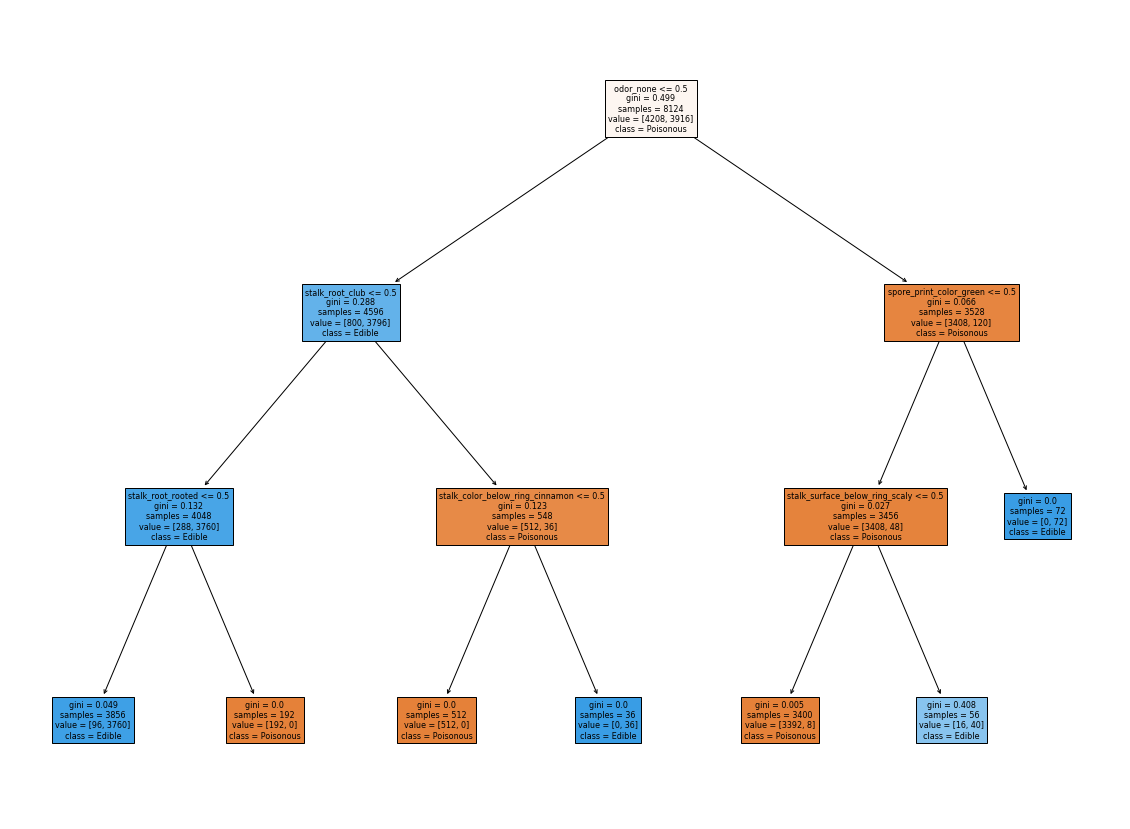

In [ ]:
#Plotting our tree

fig = plt.figure(figsize=(20,15))
thing = tree.plot_tree(treeclf, 
                   feature_names=feature_cols,  
                   class_names=['Poisonous','Edible'],
                   filled=True)


The great thing about decision trees is that they can be visualised and explained compared to most machine learning algorithms.

---

Left = True and Right=False


In [ ]:
# printing out the scores 

# .score method prints out an accuracy score for us, 
# therefore we don't actually need to make a predition

print(f'Score on training set: {treeclf.score(X_train, y_train)}')
print(f'Score on testing set: {treeclf.score(X_test, y_test)}')

Score on training set: 0.98569010617018
Score on testing set: 0.9833846153846154


Almost perfect score, we can definitely do better than this. Lets do a GridSearchCV to find the best parameters. 

---

We can use gridsearch to optimise our model; it tests all possible hyperparameter values and returns the best model based on the scoring metric.

In [ ]:
# GridSearch 

grid = GridSearchCV(estimator = DecisionTreeClassifier(),
                    param_grid = {'max_depth': [3, 5, 7, 10],
                                  'min_samples_split': [5, 10, 15, 20],
                                  'min_samples_leaf': [2, 3, 4, 5, 6, 7]},
                    cv = 5,
                    refit = True,
                    verbose = 1,
                    scoring = 'accuracy')

In [ ]:
#Running our gridsearch
#Using the time package to time how long it takes to run
now = time()

#This calls our gridsearch
grid.fit(X_train, y_train)

print(f' Time in seconds: {time() - now}')



Fitting 5 folds for each of 96 candidates, totalling 480 fits
 Time in seconds: 3.1886019706726074


In [ ]:
# Returns the best hyperparameters found from our gridsearch

grid.best_params_


{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [ ]:
# Returns the mean score of the best model
grid.best_score_

0.9996923076923077

In [ ]:
# Shows the best scoring model
grid.best_estimator_


DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [ ]:
# Fitting our model using the best hyperparameters found from our gridesearch
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [ ]:
#Fitting our model

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

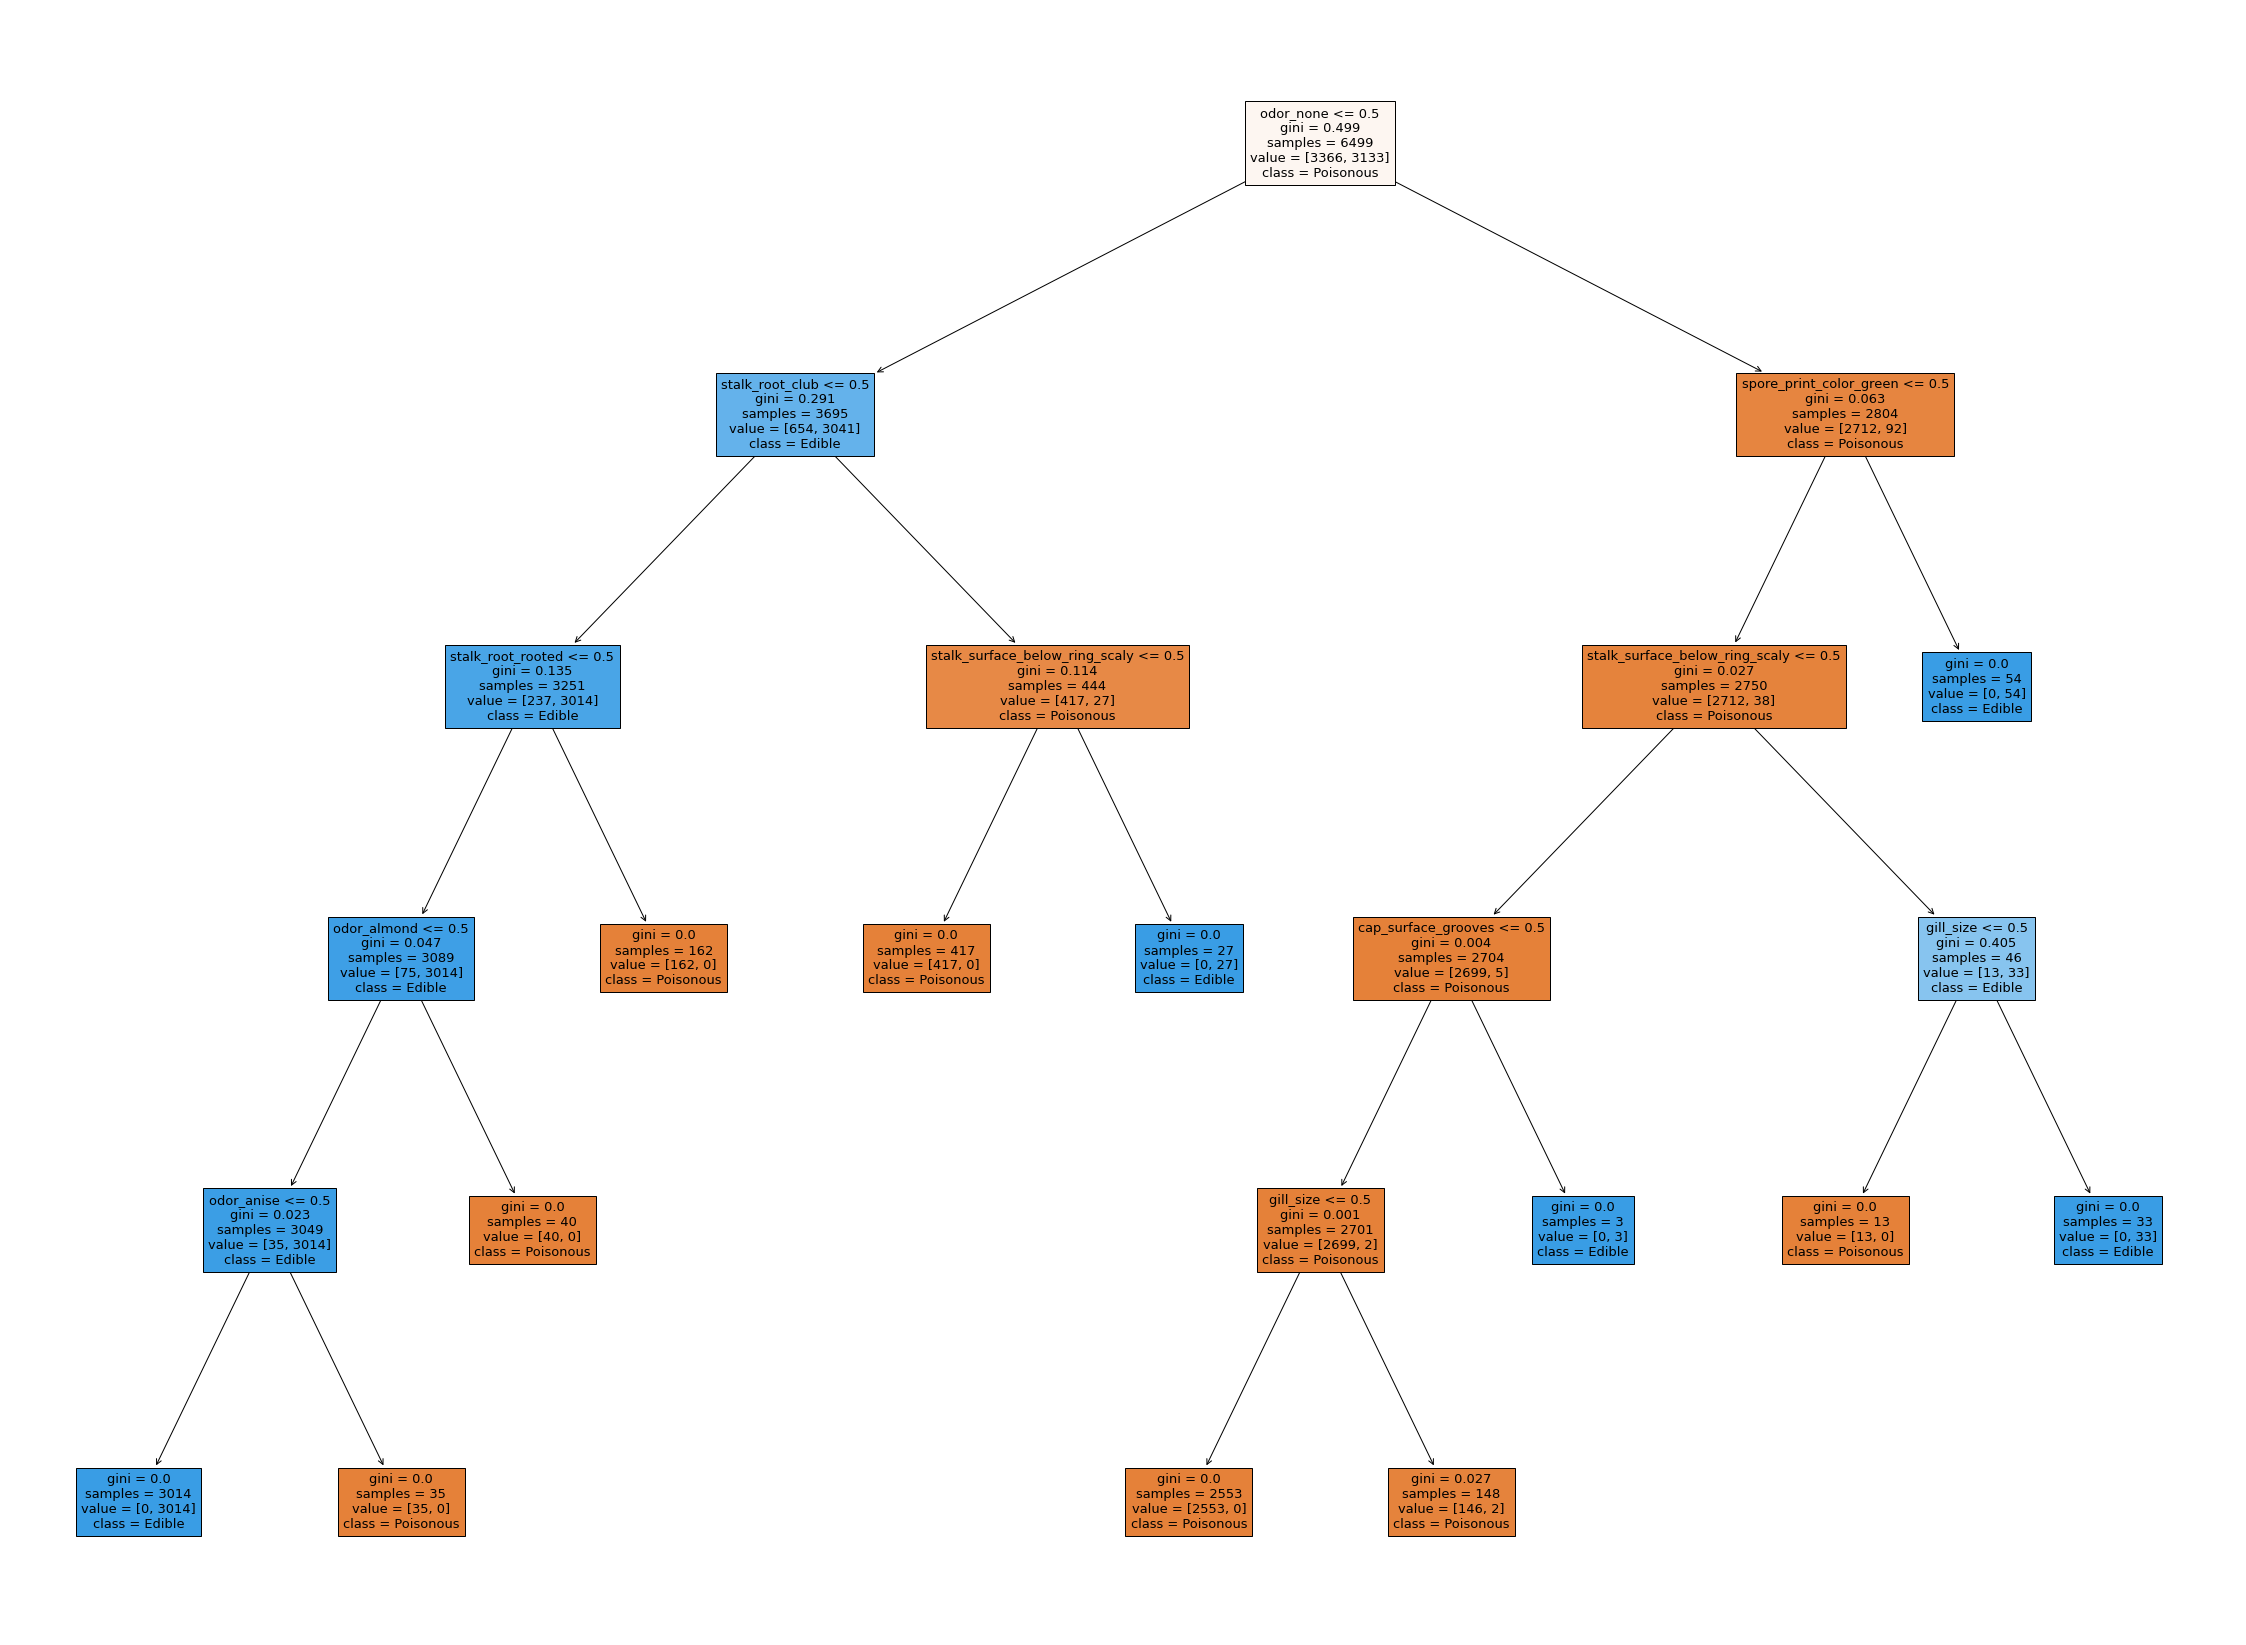

In [ ]:
#Plotting our decision tree

fig = plt.figure(figsize=(40,30))
thing = tree.plot_tree(dt, 
                   feature_names=feature_cols,  
                   class_names=['Poisonous','Edible'],
                   filled=True)

In [ ]:
# Evaluate model.
print(f'Score on training set: {dt.score(X_train, y_train)}')
print(f'Score on testing set: {dt.score(X_test, y_test)}')

Score on training set: 0.98569010617018
Score on testing set: 0.9833846153846154


A lot better than before but still not perfect. Dont worry, these results are still acceptable and expected considering that we used fewer features. 

In [ ]:
# Creating a copy of X_train to work with
train_results = X_train.copy()
# Class prediction of our model - 0 or 1
train_results['y_pred'] = dt.predict(X_train)
# Actual predictor values
train_results['y_real'] = y_train
# Class probability for 1 class(between 0-1) - we slice and take only the probability for 1
train_results['y_prob'] = dt.predict_proba(X_train)[:,1]

train_results

,gill_size,cap_surface_grooves,odor_almond,odor_anise,odor_none,stalk_root_club,stalk_root_rooted,stalk_surface_below_ring_scaly,stalk_color_below_ring_cinnamon,spore_print_color_green,population_clustered,ring_number_two,y_pred,y_real,y_prob
3728,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
1316,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
4381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0
4904,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0
1842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6483,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0
5315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0
1728,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0
3803,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0


In [ ]:
# Same as above 
test_results = X_test.copy()
test_results['y_pred'] = dt.predict(X_test)
test_results['y_real'] = y_test
test_results['y_prob'] = dt.predict_proba(X_test)[:,1]

test_results

,gill_size,cap_surface_grooves,odor_almond,odor_anise,odor_none,stalk_root_club,stalk_root_rooted,stalk_surface_below_ring_scaly,stalk_color_below_ring_cinnamon,spore_print_color_green,population_clustered,ring_number_two,y_pred,y_real,y_prob
6801,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0
3257,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
7422,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0
4872,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
2444,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0
1565,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
7489,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0
1583,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0


**Feature Importance**

Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.


In [ ]:
dt.feature_importances_

array([0.00577016, 0.00184627, 0.02380518, 0.02134786, 0.61420528,
       0.18088854, 0.        , 0.10470956, 0.        , 0.03178065,
       0.0156465 , 0.        ])

In [ ]:
importance = list(zip(feature_cols, list(dt.feature_importances_)))

importance

[('gill_size', 0.005770160080319094),
 ('cap_surface_grooves', 0.0018462740137996714),
 ('odor_almond', 0.023805184912271765),
 ('odor_anise', 0.021347856393416253),
 ('odor_none', 0.6142052760324834),
 ('stalk_root_club', 0.18088853574479882),
 ('stalk_root_rooted', 0.0),
 ('stalk_surface_below_ring_scaly', 0.10470955692724784),
 ('stalk_color_below_ring_cinnamon', 0.0),
 ('spore_print_color_green', 0.03178065412140403),
 ('population_clustered', 0.01564650177425896),
 ('ring_number_two', 0.0)]

In [ ]:
feat_imp = pd.DataFrame(dt.feature_importances_, index=X_train.columns, columns=["feat_imp"])
feat_imp = feat_imp.sort_values("feat_imp", ascending=False)
feat_imp.style.background_gradient("Blues")

,feat_imp
odor_none,0.614205
stalk_root_club,0.180889
stalk_surface_below_ring_scaly,0.104710
spore_print_color_green,0.031781
odor_almond,0.023805
odor_anise,0.021348
population_clustered,0.015647
gill_size,0.005770
cap_surface_grooves,0.001846
stalk_root_rooted,0.000000


Test accuracy =  0.9996922603477458


0.9996922603477458

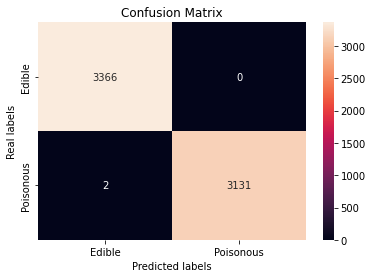

In [ ]:
# confusion matrix - using model probabilities 
produce_confusion('Poisonous','Edible', 0.5, train_results, 'y_pred', 'y_real')

Test accuracy =  0.9987692307692307


0.9987692307692307

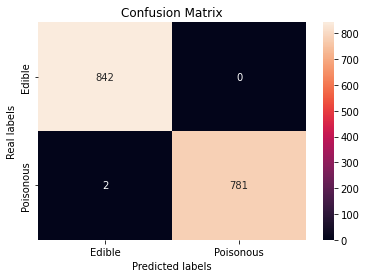

In [ ]:
# confusion matrix - using model probabilities 
produce_confusion('Poisonous','Edible', 0.5, test_results, 'y_pred', 'y_real')

#🌲🌲🌲 **Random Forest** 🌲🌲🌲

Lets explore the Random Forest Classifier! 


---



The Random Forest algorithm is made up of a collection of decision trees, and each tree in the ensemble is made up of a sample of data drawn from a training set with replacement. This is called the bootstrap sample.

Unlike decision trees, which tend to fit all the samples within training data, random forest won't overfit the model as it averages uncorrelated trees to reduce variance and prediction error.


---


Where we'll use a GridSearchCV to evaluate the model with several combination of parameters and, depending on the results, we'll decide if we go further tunning the model, or just keep the best finding. Let's begin.

In [ ]:
#Random Forests/Extra trees essentially work using the principles from ensembling
#The use bootstrapping to predict across a bunch of decision trees(n_estimators = amount of decision trees)


rf = RandomForestClassifier(n_estimators=50)
et = ExtraTreesClassifier(n_estimators=50)

In [ ]:
#Obtaining cross validation scores for rf and et

rf_score = cross_val_score(rf, X_train, y_train, cv=5)
et_score = cross_val_score(et, X_train, y_train, cv=5)

In [ ]:
#Printing results of the scores

print(f'Random scored {rf_score}')
print(f'Extra Random scored {et_score}')


Random scored [1.         0.99846154 1.         1.         1.        ]
Extra Random scored [1.         0.99846154 1.         1.         1.        ]


In [ ]:

#Although ensembling and random forests typically improve model results from decision trees
#They still need to be subject to the usual tunning of hyperparameters to improve the model further
#Gridsearch can be used for this

rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}


gs = GridSearchCV(rf, param_grid=rf_params, cv=5)

gs.fit(X_train, y_train)

print(gs.best_score_)

gs.best_params_

##

0.9996923076923077


{'max_depth': None, 'n_estimators': 100}

In [ ]:

gs.score(X_train, y_train)

1.0

In [ ]:
## Predict on Train
## Check Accuracy, Precision, Recall & F1

predictions_rf_train = pd.DataFrame(index=X_train.index)

predictions_rf_train['Pred'] = gs.predict(X_train)
predictions_rf_train['Actual'] = y_train

apr(predictions_rf_train['Pred'],predictions_rf_train['Actual'])


Accuracy:1.0
Precision:1.0
Recall:1.0
F1:1.0


(1.0, 1.0, 1.0, 1.0)

In [ ]:

## Predict on Test
## Check Accuracy, Precision, Recall & F1

## Predict on Train
## Check Accuracy, Precision, Recall & F1

predictions_rf_test = pd.DataFrame(index=X_test.index)

predictions_rf_test['Pred'] = gs.predict(X_test)
predictions_rf_test['Actual'] = y_test

apr(predictions_rf_test['Pred'],predictions_rf_test['Actual'])

Accuracy:1.0
Precision:1.0
Recall:1.0
F1:1.0


(1.0, 1.0, 1.0, 1.0)

Looks like we have a perfect classifier! 🎯

# **Evaluating Decision Tree and Random Forest classifiers** 

Initially, I used all the columns I had to make my models and the results I got from both decision tree, and RF was 1 – meaning the models were perfectly classifying between edible and poisonous mushrooms. 

---

I then used feature importance to calculate the most important feature used within the decision tree classifier in which I then selected the following columns below, which I used to simplify my model. 

---

(If you have been following my code, you can get the result on the table below by remove all the columns expect ‘class’ in the feature engineering section (cols_to_remove & X = df.drop(columns = [ ]).

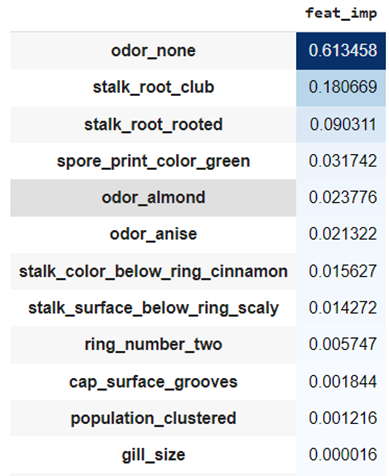


The results I got from simplifying my Decision Tree model was 0.9 for both training and testing sets. 

---

The results I got on my Random Forest classification was 1, which is great as we managed to simplify the model to only a few features and still get a prefect prediction.


# **Conlusion**

Lets wrap this up now, as you can see the mushroom dataset is very much predictable and before we even used Machine learning to classifier whether a mushroom is edible or poisonous, we could already tell which mushrooms were edible or poisonous just by exploring the data.

---

So for those of you that have made it this far, the summary below will provide you will a list of features you should look out for, should you ever find yourselves hunting for mushrooms or just lost and hungry in the forest. 

## **Summary**

---

**Features for distinguishing edible from poisonous mushrooms are as follows:**

* **Odor** – Simple rule if the mushroom smells foul, fishy, spicy, pungent, creosote and musty then just live it alone. If it smells like almond or anise then it’s good to eat. If the mushroom has no odor then it’s likely to be edible.

* **Gill color** – If the mushroom gill is buff or green colored then it is poisonous. If the gill color is red or orange then it is safe to eat. 

* **Gill spacing** – Most mushrooms that have a crowded spacing gill are edible.  

* **Ring type** – all flaring ring type mushrooms are edible as opposed to all large and none ring type are poisonous. Most pendant ring type mushrooms are edible. 

* **Bruises** – Bruised mushrooms are more likely to be edible, whereas poisonous mushrooms are to have no bruises. 

* **Stalk surface below ring** – Most smooth, fibrous and scaly stalk surface below ring mushrooms are edible, whereas most silky ones are poisonous. 

* **Spore print color** – All green spore print mushrooms are poisonous. All purple, orange, yellow, buff spore print mushrooms are poisonous. Chocolate and white spore print mushrooms are more likely to be poisonous whereas brown and black spore print mushrooms are likely to be edible. 

* **Stalk root** – Mushrooms with equal, club and rooted stalk root are more likely to be edible than mushrooms with missing stalk root. 

**Disclaimer:** I’m not a mushroom expert, I’m just a junior data scientist exploring a dataset so I implore that before you eat any mushrooms, you check multiple features so that you can be 100% sure that the mushroom is not poisonous.


Thank you for taking the time to read my blog!😊	